In [2]:
import matplotlib.pyplot as plt
import os
import pandas as pd
from datetime import datetime, timedelta

# Tests

## RMSs

In [3]:
bp_path = "/run/media/poulpos/PIGS-KU-BU1/bandpassed"
farm = "BOX1-FARMEIK"

In [5]:
df = pd.read_csv(os.path.join(data_path, "BOX1-FARMEIK_20230801_134500.csv"))

In [4]:
all = {}
farms = ["BOX1-FARMEIK"]# os.listdir(bp_path)
for farm in farms:
    print(farm)
    df = pd.DataFrame(columns=["start_in_nof", "end_in_nof", "rms"])
    for f in os.listdir(os.path.join(bp_path, farm, "rms"))[:100]:
        abs_file = os.path.join(bp_path, farm, "rms", f)
        if os.path.isfile(abs_file):
            df = pd.concat([df, pd.read_csv(abs_file)], ignore_index=True)
    all[farm] = df['rms']

BOX1-FARMEIK


In [10]:
for q in range(11):
    print(f"q{q/10}: {all[farm].quantile(q=q/10)}")

q0.0: 0.035890058
q0.1: 0.068811305
q0.2: 0.079126662
q0.3: 0.0862958035
q0.4: 0.092842938
q0.5: 0.10008687
q0.6: 0.10870886
q0.7: 0.12036548999999999
q0.8: 0.14091213600000002
q0.9: 0.17138576500000005
q1.0: 0.8923875


{'whiskers': [<matplotlib.lines.Line2D at 0x7f25c6167fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f25c6184400>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f25c6167d00>,
 'medians': [<matplotlib.lines.Line2D at 0x7f25c6184940>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f25c6184be0>,
 'means': []}

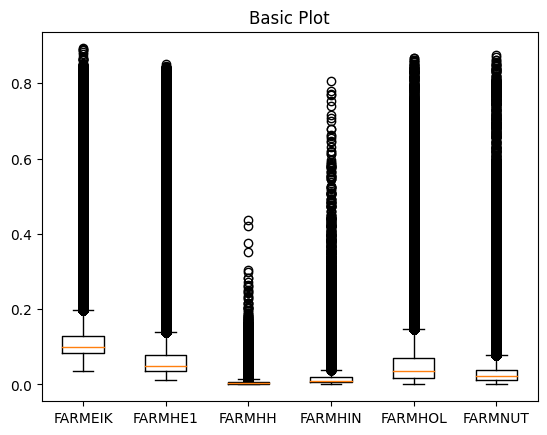

In [70]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(all.values(), labels=[k[5:] for k in all.keys()])

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f25c603f1f0>,
 'cmeans': <matplotlib.collections.LineCollection at 0x7f25c622e860>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f25c60789d0>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f25c6078e20>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f25c6079270>,
 'cmedians': <matplotlib.collections.LineCollection at 0x7f25c60796c0>}

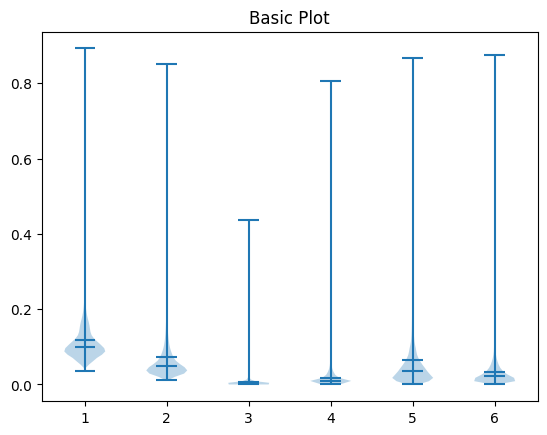

In [71]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.violinplot(all.values(), showmeans=True, showmedians=True)

## Saturation rates

In [46]:
bp_path = "/run/media/poulpos/PIGS-KU-BU1/bandpassed"
farm = "BOX1-FARMNUT"
data_path = os.path.join(bp_path, farm, "saturation")

In [47]:
df = pd.DataFrame(columns=["start_in_nof", "end_in_nof", "label"])
n = 100
for f in os.listdir(data_path)[:n]:
    df = pd.concat([df, pd.read_csv(os.path.join(data_path,f))], ignore_index=True)
sr = 44100
df['start_in_nof'] /= sr
df['end_in_nof'] /= sr
df.rename(columns={'start_in_nof':'start', 'end_in_nof':'end'}, inplace=True)
df['duration'] = df['end'] - df['start']
total = timedelta(seconds=df['duration'].sum())
print(f"Saturation rate: {total} out of {timedelta(minutes=15*n)}")

Saturation rate: 0:58:55.874694 out of 1 day, 1:00:00


start_in_nof end_in_nof label
0         56.0       57.0   sat
1        169.0      170.0   sat
2        254.0      255.0   sat
3        295.0      296.0   sat
4        367.0      368.0   sat

In [33]:
df.head()

start_in_nof end_in_nof label
0         56.0       57.0   sat
1        169.0      170.0   sat
2        254.0      255.0   sat
3        295.0      296.0   sat
4        367.0      368.0   sat

# Audacity

In [72]:
bp_path = "/run/media/poulpos/PIGS-KU-BU1/bandpassed"
farm = "BOX1-FARMEIK"
file = "BOX1-FARMEIK_20230803_000000.csv" # "BOX1-FARMEIK_20230802_111500.csv"
q = pd.read_csv(os.path.join(bp_path, farm, "rms", file))
q['start'] = q['start_in_nof'] / 44100
q['end'] = q['end_in_nof'] / 44100
q = q[['start', 'end', 'rms']]
# q.to_csv("/tmp/eik-0-rms.tsv", index=False, sep="\t", header=False)

In [21]:
abs(-12)

12

In [32]:
def merge(q):

    return q

In [73]:
q[:10]

start       end       rms
0   0.00  0.249977  0.062392
1   0.25  0.499977  0.085810
2   0.50  0.749977  0.085402
3   0.75  0.999977  0.089374
4   1.00  1.249977  0.071709
5   1.25  1.499977  0.106623
6   1.50  1.749977  0.105901
7   1.75  1.999977  0.097127
8   2.00  2.249977  0.067179
9   2.25  2.499977  0.095289

In [74]:
q.drop(q[q['rms'] < 0.10008687].index, inplace=True)


In [75]:
q[:10]

start        end       rms
5     1.25   1.499977  0.106623
6     1.50   1.749977  0.105901
11    2.75   2.999977  0.100113
21    5.25   5.499977  0.101105
31    7.75   7.999977  0.116038
111  27.75  27.999977  0.112380
127  31.75  31.999977  0.102403
135  33.75  33.999977  0.104018
155  38.75  38.999977  0.102707
167  41.75  41.999977  0.104182

In [76]:
q['ok'] = True
prev_end = -10
epsilon = 0.05
lprev = 0
for index  in q.index:
    row = q.loc[index]
    if abs(prev_end - row['start']) < epsilon:
        print(f"{prev_end} -> {row['start']}")
        q.loc[lprev, "end"] = row['end']
        q.loc[lprev, "rms"] = min(q.loc[lprev, "rms"], row['rms'])
        q.loc[index, "ok"] = False
    else:
        print(index)
        lprev = index
    prev_end = row['end']
q.drop(q[q["ok"] == False].index, inplace=True)
q.drop(columns=["ok"], inplace=True)
q.head()

5
1.4999773242630385 -> 1.5
11
21
31
111
127
135
155
167
174
189
209
52.499977324263035 -> 52.5
218
223
237
59.499977324263035 -> 59.5
247
257
64.49997732426304 -> 64.5
64.74997732426304 -> 64.75
274
278
285
71.49997732426304 -> 71.5
71.74997732426304 -> 71.75
289
72.49997732426304 -> 72.5
72.74997732426304 -> 72.75
293
307
311
313
78.49997732426304 -> 78.5
78.74997732426304 -> 78.75
317
79.49997732426304 -> 79.5
322
80.74997732426304 -> 80.75
325
81.49997732426304 -> 81.5
81.74997732426304 -> 81.75
335
337
84.49997732426304 -> 84.5
84.74997732426304 -> 84.75
341
85.49997732426304 -> 85.5
85.74997732426304 -> 85.75
345
86.49997732426304 -> 86.5
349
87.49997732426304 -> 87.5
354
88.74997732426304 -> 88.75
357
89.49997732426304 -> 89.5
361
90.49997732426304 -> 90.5
366
91.74997732426304 -> 91.75
374
93.74997732426304 -> 93.75
377
379
389
97.49997732426304 -> 97.5
97.74997732426304 -> 97.75
97.99997732426304 -> 98.0
98.24997732426304 -> 98.25
98.49997732426304 -> 98.5
98.74997732426304 ->

start        end       rms
5     1.25   1.749977  0.105901
11    2.75   2.999977  0.100113
21    5.25   5.499977  0.101105
31    7.75   7.999977  0.116038
111  27.75  27.999977  0.112380

In [77]:
q.to_csv("/tmp/eik-0f-rms.tsv", index=False, sep="\t", header=False)